## Figure 5 Code to Produce Figures

This figure will focus on the presentation of Motif Analysis.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from difflib import diff_bytes
import seaborn as sns
import h5py
import scipy
import networkx as nx
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (10,10)

### Power Analysis for Chain Motif Results

In [2]:
# estimate sample size via power analysis: All Assemblies Together
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
nobs1 = 109
effect = 153 / 100
alpha = 0.05
p = 0.95
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power= p, nobs1= None, ratio= 58 / nobs1, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 17.345


In [3]:
# estimate sample size via power analysis
from statsmodels.stats.power import tt_ind_solve_power
# parameters for power analysis
nobs1_array = [13, 6, 5, 6, 6, 9, 4, 41, 23, 11, 7, 12, 12, 6, 11]
mean_diff_by_difference = [26.24, 29.24, 29.24, 29.24, 29.24, 29.24, 29.24, 3.19, 5.24, 26.33, 10.47, 28.82, 28.66, 27.74, 21.24]
alpha = 0.05
# perform power analysis
for i, n in enumerate(nobs1_array):
    effect = mean_diff_by_difference[i] / 30
    r =  58 / n
    result = tt_ind_solve_power(effect_size = effect, nobs1 = None, alpha = alpha, power = 0.95, ratio = r)
    print(f'Sample Size for Assembly {i + 1}: %.3f' % result)

Sample Size for Assembly 1: 21.151
Sample Size for Assembly 2: 15.277
Sample Size for Assembly 3: 15.012
Sample Size for Assembly 4: 15.277
Sample Size for Assembly 5: 15.277
Sample Size for Assembly 6: 16.064
Sample Size for Assembly 7: 14.747
Sample Size for Assembly 8: 1962.506
Sample Size for Assembly 9: 595.391
Sample Size for Assembly 10: 20.381
Sample Size for Assembly 11: 119.771
Sample Size for Assembly 12: 17.330
Sample Size for Assembly 13: 17.520
Sample Size for Assembly 14: 16.953
Sample Size for Assembly 15: 31.150


### Explorative Analysis of Connectivity Matrix

In [4]:
ground_truth_connectome_v1dd_1 = np.load("ground_truth_connectome_v1dd_1.npy")
ground_truth_connectome_v1dd_1.shape

print("Total connections", np.sum(ground_truth_connectome_v1dd_1))
ground_truth_connectome_v1dd_1

Total connections 171492.0


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 16.],
       [ 0.,  0.,  0., ...,  0.,  4.,  0.]])

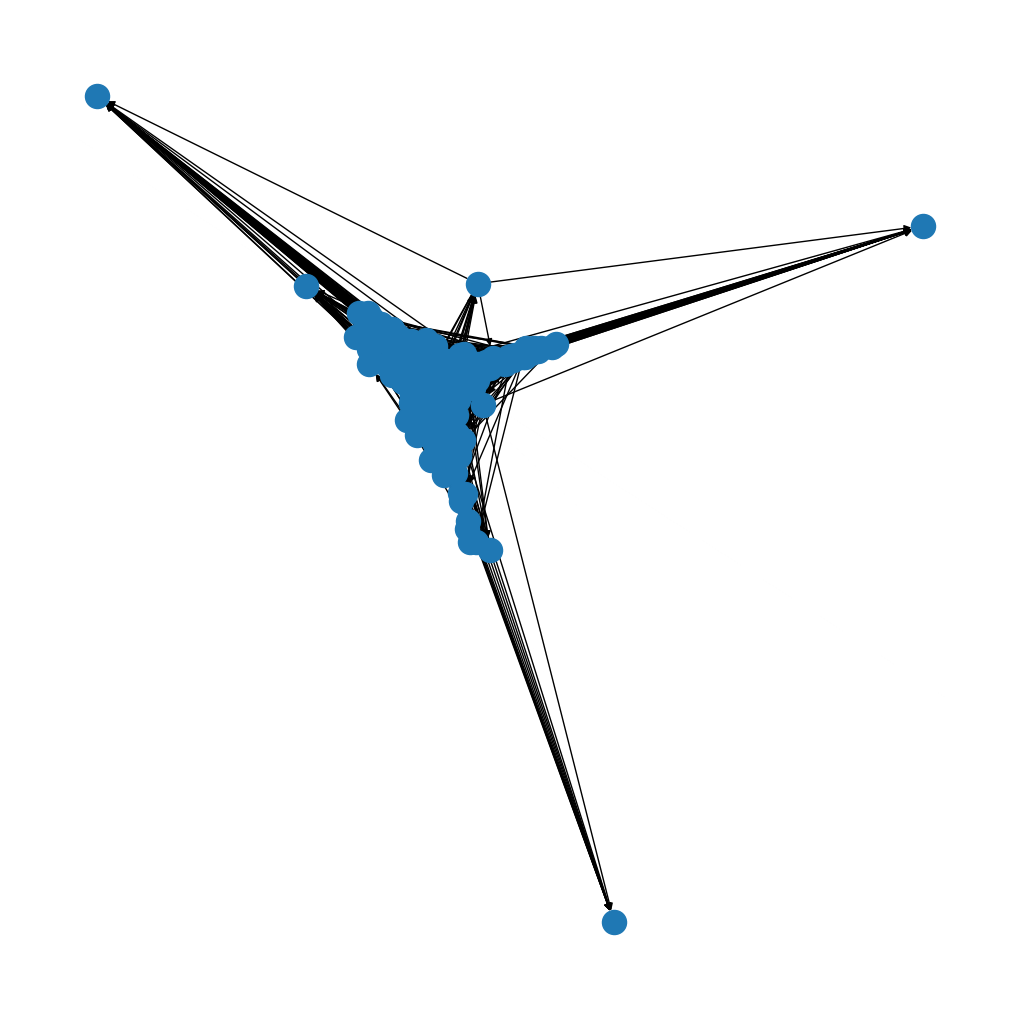

In [5]:
pyr_graph = nx.from_numpy_array(ground_truth_connectome_v1dd_1, create_using=nx.DiGraph)
nx.draw(pyr_graph)

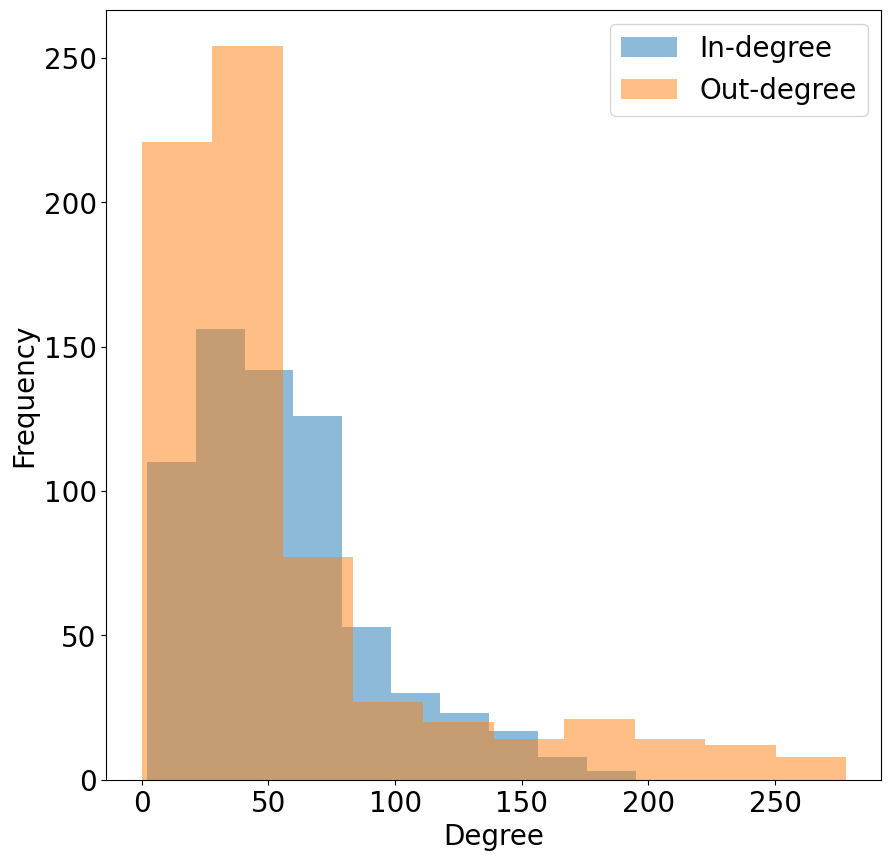

In [6]:
# Degree distribution
in_degrees = dict(pyr_graph.in_degree())
out_degrees = dict(pyr_graph.out_degree())

plt.hist(list(in_degrees.values()), bins=10, alpha=0.5, label='In-degree')
plt.hist(list(out_degrees.values()), bins=10, alpha=0.5, label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
# Clustering coefficient
clustering_coefficient = nx.average_clustering(pyr_graph)
print("Clustering coefficient:", clustering_coefficient)

Clustering coefficient: 0.2523980727735077


In [8]:
# Strongly connected components
""" https://networkx.org/documentation/stable/_modules/networkx/algorithms/components/strongly_connected.html#strongly_connected_components
Parameters
    ----------
    G : NetworkX Graph
        A directed graph.

    Returns
    -------
    comp : generator of sets
        A generator of sets of nodes, one for each strongly connected
        component of G.
"""
strongly_connected_components = list(nx.strongly_connected_components(pyr_graph))
num_strongly_connected_components = len(strongly_connected_components)
print("Number of strongly connected components:", num_strongly_connected_components)

sizes_strongly_connected_components = [len(component) for component in strongly_connected_components]
print("Sizes of strongly connected components:", sizes_strongly_connected_components)

Number of strongly connected components: 4
Sizes of strongly connected components: [1, 1, 1, 665]


### First-Order Connection Analysis Assemblies

In [9]:
ground_truth_connectome_v1dd_1 = np.load("ground_truth_connectome_v1dd_1.npy")
ground_truth_connectome_v1dd_1.shape

print("Total connections", np.sum(ground_truth_connectome_v1dd_1))
ground_truth_connectome_v1dd_1

Total connections 171492.0


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 16.],
       [ 0.,  0.,  0., ...,  0.,  4.,  0.]])

In [10]:
range(len(ground_truth_connectome_v1dd_1[0]))

range(0, 668)

In [11]:
chain_motifs = pd.read_pickle("chain_motifs_og.pkl")
assemblies_by_coregistered = pd.read_pickle("v1dd_connectome_cell_indexes_by_assembly.pkl")
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,):print(assemblies_by_coregistered)

c = []
for i in assemblies_by_coregistered.values():
    c.append(i)
assembly_root_ids = np.unique(np.concatenate(c))
print(assembly_root_ids)

{0: [64, 149, 89, 10, 12, 87, 122, 62, 109, 69, 52, 108, 110, 159, 66, 135, 92, 45, 24, 42, 153, 41], 1: [148, 130, 125], 2: [76, 75, 4, 78, 58, 112, 59, 17, 90], 3: [14, 73], 4: [11, 65, 99, 39], 5: [14, 65, 34], 6: [148], 7: [70, 64, 149, 1, 75, 89, 78, 88, 150, 71, 167, 87, 47, 48, 62, 109, 69, 52, 55, 123, 152, 53, 117, 68, 22, 56, 144, 66, 125, 92, 156, 126, 72, 137, 32, 24, 153, 138, 141, 102, 95, 104, 94, 27], 8: [4, 78, 13, 167, 47, 120, 80, 63, 52, 55, 112, 157, 51, 59, 159, 113, 35, 144, 156, 160, 126, 90, 37, 29, 26, 104], 9: [84, 80, 79, 55, 22, 56, 144, 72, 33, 93, 141, 98], 10: [82, 128, 63, 112, 101, 39], 11: [64, 149, 150, 71, 147, 62, 129, 74, 110, 124, 57, 159, 117, 68, 144, 66, 92, 160, 126, 28, 161], 12: [64, 149, 75, 12, 150, 71, 124, 57, 158, 117, 20, 161], 13: [21, 149, 75, 109, 69, 53, 110, 57, 159, 158, 117, 155, 160, 28, 41, 161], 14: [3, 149, 12, 150, 71, 167, 62, 111, 124, 57, 20, 66, 23, 153, 101, 161]}
[  1   3   4  10  11  12  13  14  17  20  21  22  23  

In [12]:
assembly_first_order_connections = []
c_in_assembly = 0
non_assembly_first_order_connections = []
c_no_assembly = 0
for i in range(len(ground_truth_connectome_v1dd_1[0])):
    if (i+1) in assembly_root_ids:
        c_in_assembly += 1
        assembly_first_order_connections.append(np.sum(ground_truth_connectome_v1dd_1[i,:]))
    else:
        c_no_assembly += 1
        non_assembly_first_order_connections.append(np.sum(ground_truth_connectome_v1dd_1[i,:]))

In [13]:
c_in_assembly, c_no_assembly

(104, 564)

In [14]:
np.mean(assembly_first_order_connections)

289.4230769230769

In [15]:
np.mean(non_assembly_first_order_connections)

250.6950354609929

/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


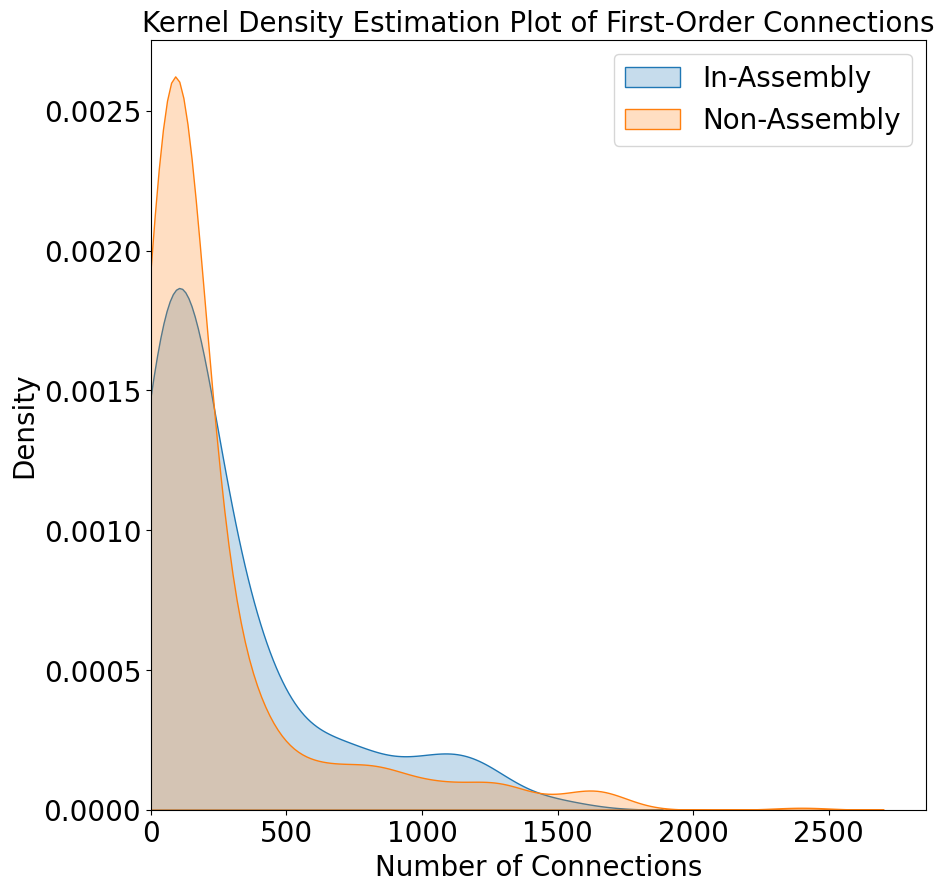

<Figure size 1000x1000 with 0 Axes>

In [16]:
### See the general distribution of the assembly counts to justify the statistical test
## In-assemlby test is bi-modal, so t-test wouldn't be the best to use 
sns.kdeplot(assembly_first_order_connections, fill = True, label = 'In-Assembly')
sns.kdeplot(non_assembly_first_order_connections, fill = True, label = 'Non-Assembly')
plt.legend()
plt.title('Kernel Density Estimation Plot of First-Order Connections', size = 20)
plt.xlabel('Number of Connections', size = 20)
plt.ylabel('Density', size = 20)
plt.xlim(0)
plt.show()
plt.savefig("Kernel_Density_Estimator_Connections_Distributions.png", dpi = 1200)

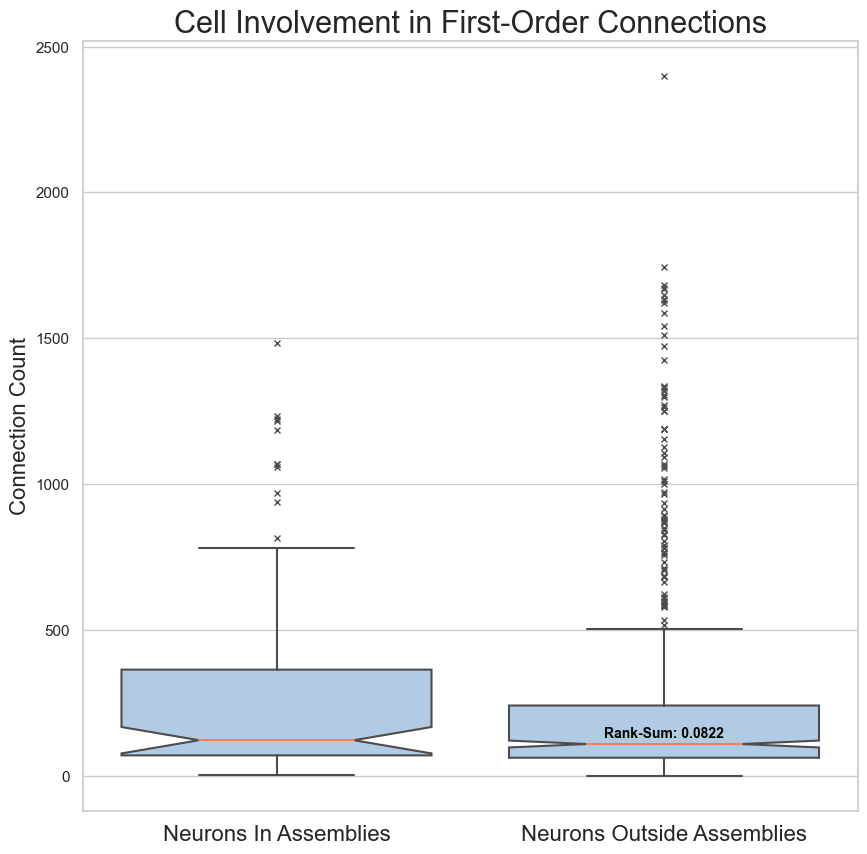

In [17]:
all_arr = [np.array(assembly_first_order_connections).flatten(),
            np.array(non_assembly_first_order_connections).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Neurons In Assemblies", "Neurons Outside Assemblies"], size = 16)
ax.set_title('Cell Involvement in First-Order Connections', size = 22)
ax.set_ylabel('Connection Count', size = 16)

medians = np.array(
    [np.median(np.array(assembly_first_order_connections).flatten()),
     np.median(np.array(non_assembly_first_order_connections).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'Rank-Sum: {:.3g}'.format(stats.ranksums(np.array(assembly_first_order_connections).flatten(), np.array(non_assembly_first_order_connections).flatten()).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('first_order_boxplot.png', dpi = 1200)
plt.show()

In [18]:
np.unique(chain_motifs.neu_cat1.values)

array([  2,   4,   5,   6,   8,   9,  10,  12,  13,  17,  19,  20,  21,
        25,  26,  28,  29,  30,  31,  32,  34,  35,  37,  38,  39,  41,
        42,  50,  51,  52,  53,  56,  60,  61,  63,  67,  68,  75,  76,
        77,  80,  81,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  97,  98, 100, 101, 102, 103, 105, 106, 109, 110, 111,
       112, 122, 123, 131, 132, 133, 134, 141, 142, 143, 144, 145, 146,
       149, 150, 151, 157, 158, 159, 160, 161, 169, 170, 171, 172, 173,
       177, 178, 179, 180, 181, 182, 183, 185, 186, 189, 191, 192, 193,
       194, 195, 196, 203, 204, 207, 208, 209, 210, 211, 212, 213, 216,
       217, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233,
       234, 235, 238, 239, 245, 246, 248, 249, 252, 253, 255, 256, 257,
       258, 259, 266, 267, 268, 269, 270, 275, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 288, 289, 291, 292, 293, 294, 295, 296, 298,
       299, 310, 311, 314, 315, 316, 319, 320, 321, 325, 326, 32

In [19]:
np.unique(chain_motifs.neu_cat2.values)

array([  2,   4,   5,   6,   8,  10,  13,  17,  20,  21,  25,  26,  27,
        28,  29,  30,  31,  32,  34,  35,  37,  38,  39,  41,  42,  50,
        51,  52,  53,  56,  59,  60,  61,  62,  63,  66,  67,  68,  75,
        76,  77,  80,  81,  83,  84,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  97,  98, 100, 101, 102, 103, 105, 106, 107, 109,
       110, 111, 112, 122, 123, 131, 132, 133, 134, 141, 142, 143, 144,
       145, 146, 148, 149, 150, 151, 157, 158, 159, 160, 161, 170, 171,
       172, 173, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 188,
       189, 191, 192, 193, 194, 195, 196, 203, 204, 206, 207, 208, 209,
       210, 211, 212, 213, 216, 217, 220, 221, 223, 224, 225, 226, 227,
       228, 229, 230, 232, 233, 234, 235, 238, 239, 245, 246, 248, 249,
       252, 253, 255, 256, 257, 258, 259, 265, 266, 267, 268, 269, 270,
       274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 288, 289,
       291, 292, 293, 294, 295, 296, 298, 299, 310, 311, 313, 31

### Chain Motif Analysis Assemblies

In [20]:
chain_motifs = pd.read_pickle("chain_motifs_og.pkl")
assemblies_by_coregistered = pd.read_pickle("v1dd_connectome_cell_indexes_by_assembly.pkl")
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,):print(assemblies_by_coregistered)

{0: [64, 149, 89, 10, 12, 87, 122, 62, 109, 69, 52, 108, 110, 159, 66, 135, 92, 45, 24, 42, 153, 41], 1: [148, 130, 125], 2: [76, 75, 4, 78, 58, 112, 59, 17, 90], 3: [14, 73], 4: [11, 65, 99, 39], 5: [14, 65, 34], 6: [148], 7: [70, 64, 149, 1, 75, 89, 78, 88, 150, 71, 167, 87, 47, 48, 62, 109, 69, 52, 55, 123, 152, 53, 117, 68, 22, 56, 144, 66, 125, 92, 156, 126, 72, 137, 32, 24, 153, 138, 141, 102, 95, 104, 94, 27], 8: [4, 78, 13, 167, 47, 120, 80, 63, 52, 55, 112, 157, 51, 59, 159, 113, 35, 144, 156, 160, 126, 90, 37, 29, 26, 104], 9: [84, 80, 79, 55, 22, 56, 144, 72, 33, 93, 141, 98], 10: [82, 128, 63, 112, 101, 39], 11: [64, 149, 150, 71, 147, 62, 129, 74, 110, 124, 57, 159, 117, 68, 144, 66, 92, 160, 126, 28, 161], 12: [64, 149, 75, 12, 150, 71, 124, 57, 158, 117, 20, 161], 13: [21, 149, 75, 109, 69, 53, 110, 57, 159, 158, 117, 155, 160, 28, 41, 161], 14: [3, 149, 12, 150, 71, 167, 62, 111, 124, 57, 20, 66, 23, 153, 101, 161]}


In [37]:
chain_motifs

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types
35,chain,"[2, 25, 30]",2,25,30,"[MC-23, BC-23, BC-23]"
36,chain,"[2, 25, 34]",2,25,34,"[MC-23, BC-23, BC-23]"
37,chain,"[2, 25, 37]",2,25,37,"[MC-23, BC-23, BC-23]"
38,chain,"[2, 25, 41]",2,25,41,"[MC-23, BC-23, BC-23]"
39,chain,"[2, 25, 75]",2,25,75,"[MC-23, BC-23, BC-23]"
...,...,...,...,...,...,...
279647,chain,"[664, 500, 234]",664,500,234,"[PYC-23, PYC-23, PYC-23]"
279648,chain,"[664, 559, 123]",664,559,123,"[PYC-23, PYC-23, PYC-23]"
279649,chain,"[664, 559, 234]",664,559,234,"[PYC-23, PYC-23, PYC-23]"
279650,chain,"[664, 604, 123]",664,604,123,"[PYC-23, PYC-23, PYC-23]"


In [21]:
# initialize data frames for keeping track of chain motifs
assembly_cat0=pd.DataFrame()
assembly_cat1=pd.DataFrame()
assembly_cat2=pd.DataFrame()

for i in assemblies_by_coregistered:
    for jj in assemblies_by_coregistered[i]:
            
                mask = chain_motifs.neu_cat0.apply(lambda x: jj == x)
                cat0 = chain_motifs[mask]
                assembly_cat0 = pd.concat([assembly_cat0,cat0])
                
                mask1 = chain_motifs.neu_cat1.apply(lambda x: jj == x)
                cat1 = chain_motifs[mask1]
                assembly_cat1 = pd.concat([assembly_cat1,cat1])
                
                
                mask2 = chain_motifs.neu_cat2.apply(lambda x: jj == x)
                cat2 = chain_motifs[mask2]
                assembly_cat2 = pd.concat([assembly_cat2,cat2])

# keep track of assembly cell ids
assembly_cat0['assembly_cell_id'] = assembly_cat0['neu_cat0']
assembly_cat1['assembly_cell_id'] = assembly_cat1['neu_cat1']
assembly_cat2['assembly_cell_id'] = assembly_cat2['neu_cat2']

In [22]:
# combine all information to one data frame
assembly_cells = pd.DataFrame()
assembly_cells = pd.concat([assembly_cat0,assembly_cat1,assembly_cat2])
assembly_cells['cell_types'] = [tuple(x) for x in assembly_cells['cell_types']]
assembly_cells

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
88582,chain,"[149, 26, 487]",149,26,487,"(PYC-23, BC-23, PYC-23)",149
88583,chain,"[149, 469, 487]",149,469,487,"(PYC-23, BC-23, PYC-23)",149
88588,chain,"[149, 442, 487]",149,442,487,"(PYC-23, BPC-23, PYC-23)",149
88592,chain,"[149, 2, 487]",149,2,487,"(PYC-23, MC-23, PYC-23)",149
88618,chain,"[149, 39, 487]",149,39,487,"(PYC-23, PYC-23, PYC-23)",149
...,...,...,...,...,...,...,...
273175,chain,"[611, 493, 161]",611,493,161,"(BPC-23, PYC-23, PYC-23)",161
273247,chain,"[611, 509, 161]",611,509,161,"(BPC-23, PYC-23, PYC-23)",161
273319,chain,"[611, 535, 161]",611,535,161,"(BPC-23, PYC-23, PYC-23)",161
273391,chain,"[611, 539, 161]",611,539,161,"(BPC-23, PYC-23, PYC-23)",161


In [23]:
### define the assembly counts
assembly_counts = assembly_cells['assembly_cell_id'].value_counts()
assembly_counts

assembly_cell_id
101    9432
53     7786
123    7701
144    6896
159    6328
20     5970
112    5817
51     5534
35     5372
160    5295
26     5080
39     4958
161    4480
42     4441
89     4030
28     3272
158    2804
10     2720
150    2628
17     2163
21     2130
94     2118
75     2108
32     1922
110    1908
87     1844
84     1683
52     1638
95     1551
76     1543
13     1504
80     1496
111    1374
149    1302
122    1242
63     1166
98     1086
41      988
109     978
68      780
90      768
29      702
92      669
102     441
93      437
88      361
34      318
148     314
37      298
66      256
4       182
141     176
56      160
12      150
62      144
59       34
27       33
157      27
Name: count, dtype: int64

In [24]:
### derive the same information from the non-assembly set
non_assembly_motifs = pd.read_pickle("non_assembly_cells_chain_og.pkl")
non_assembly_motifs

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id,assembly_id
3816,chain,"[5, 20, 30]",5,20,30,"[PYC-23, BC-23, BC-23]",5,()
3817,chain,"[5, 20, 291]",5,20,291,"[PYC-23, BC-23, BC-23]",5,()
3818,chain,"[5, 25, 30]",5,25,30,"[PYC-23, BC-23, BC-23]",5,()
3819,chain,"[5, 25, 291]",5,25,291,"[PYC-23, BC-23, BC-23]",5,()
3821,chain,"[5, 30, 291]",5,30,291,"[PYC-23, BC-23, BC-23]",5,()
...,...,...,...,...,...,...,...,...
258299,chain,"[588, 314, 170]",588,314,170,"[MC-23, PYC-23, PYC-23]",170,()
258313,chain,"[588, 420, 170]",588,420,170,"[MC-23, PYC-23, PYC-23]",170,()
258327,chain,"[588, 513, 170]",588,513,170,"[MC-23, PYC-23, PYC-23]",170,()
258341,chain,"[588, 577, 170]",588,577,170,"[MC-23, PYC-23, PYC-23]",170,()


In [25]:
non_assembly_counts = non_assembly_motifs['assembly_cell_id'].value_counts()
non_assembly_counts

assembly_cell_id
31     13578
351     7857
51      5534
2       4565
21      4260
53      3893
89      2015
5       1957
268     1590
76      1543
158     1402
217     1234
98      1086
170      930
224      786
269      730
150      657
230      641
192      624
437      550
646      543
173      481
102      441
68       390
61       333
109      326
325      303
177      208
25       192
86       148
4         91
19        62
176       50
9         27
Name: count, dtype: int64

/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


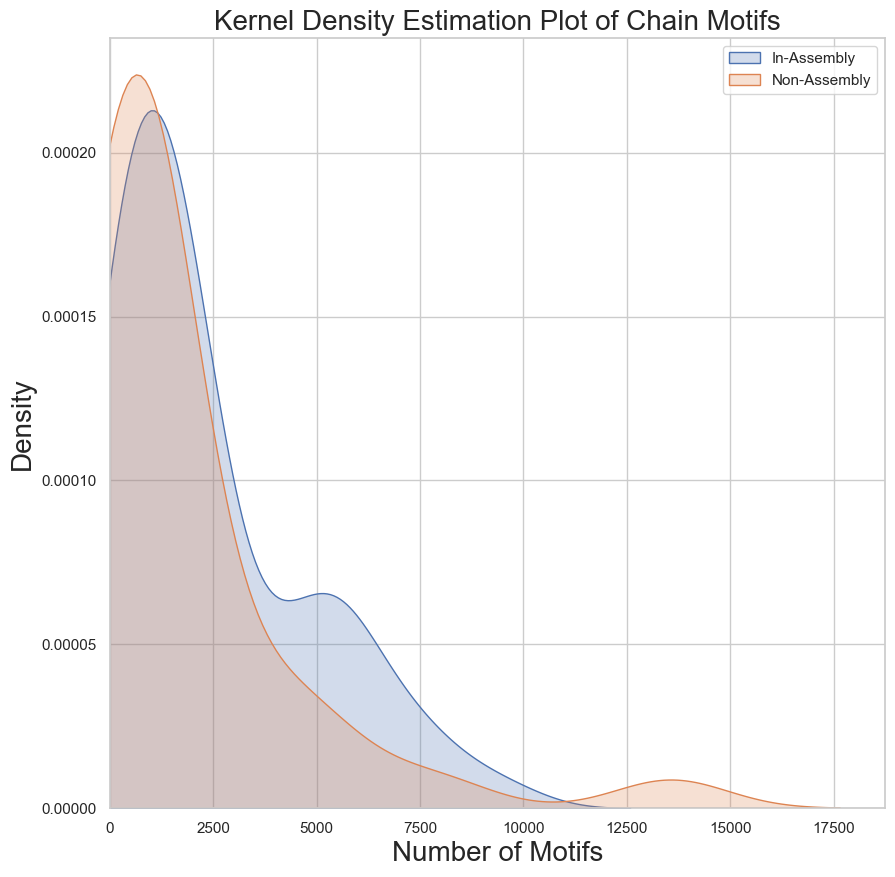

<Figure size 1000x1000 with 0 Axes>

In [26]:
### See the general distribution of the assembly counts to justify the statistical test
## In-assemlby test is bi-modal, so t-test wouldn't be the best to use 
sns.kdeplot(assembly_counts, fill = True, label = 'In-Assembly')
sns.kdeplot(non_assembly_counts, fill = True, label = 'Non-Assembly')
plt.legend()
plt.title('Kernel Density Estimation Plot of Chain Motifs', size = 20)
plt.xlabel('Number of Motifs', size = 20)
plt.ylabel('Density', size = 20)
plt.xlim(0)
plt.show()
plt.savefig("Kernel_Density_Estimator_Motif_Distributions.png", dpi = 1200)

In [27]:
### FOUND THIS CODE AT THIS LINK SAI: MAYBE TRY TO PLAY WITH IT https://stackoverflow.com/questions/70613625/how-can-i-generate-a-cdf-using-kernel-density-estimation-in-python
# kde_a = stats.gaussian_kde(assembly_counts)
# kde_na = stats.gaussian_kde(non_assembly_counts)

# class KDEDist(stats.rv_continuous):
    
#     def __init__(self, kde, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         self._kde = kde
    
#     def _pdf(self, x):
#         return self._kde.pdf(x)

# A_X = KDEDist(kde_a)
# NA_X = KDEDist(kde_na)

# fig, axe = plt.subplots()
# #axe.hist(data, density=1)
# axe.plot(x, A_X.cdf(x))
# #axe.plot(x, NA_X.cdf(x))

In [28]:
print(np.mean(assembly_counts), np.mean(non_assembly_counts))
print(np.median(assembly_counts), np.median(non_assembly_counts))

2388.5862068965516 1736.0882352941176
1547.0 649.0


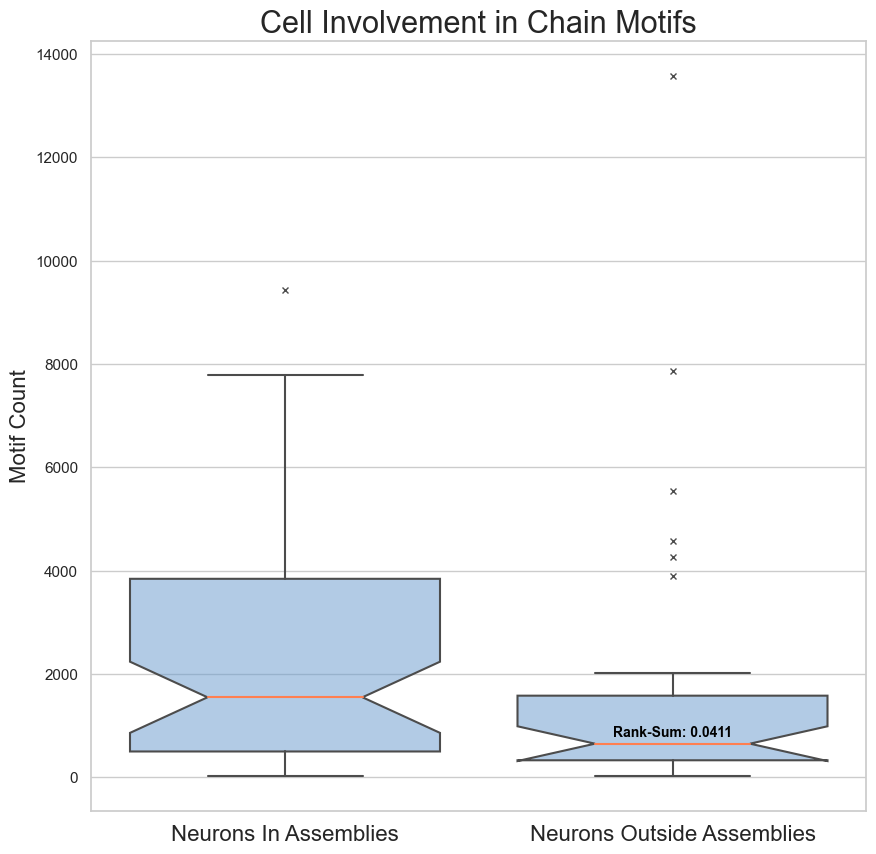

In [29]:
all_arr = [np.array(assembly_counts).flatten(),
            np.array(non_assembly_counts).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Neurons In Assemblies", "Neurons Outside Assemblies"], size = 16)
ax.set_title('Cell Involvement in Chain Motifs', size = 22)
ax.set_ylabel('Motif Count', size = 16)

medians = np.array(
    [np.median(np.array(assembly_counts).flatten()),
     np.median(np.array(non_assembly_counts).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'Rank-Sum: {:.3g}'.format(stats.ranksums(np.array(assembly_counts).flatten(), np.array(non_assembly_counts).flatten()).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('chain_motif_boxplot.png', dpi = 1200)
plt.show()

### Chain Motif Analysis Assemblies (corrected indexes + more coregistered)

In [2]:
import v1dd_coregistration_wrangling

tables, mappings = v1dd_coregistration_wrangling.get_tables_and_mappings(online=True)

{None: [14], 630: [1, 4, 7, 8], 246: [1, 11], 101: [1], 247: [1], 181: [1], 43: [1, 4], 343: [1], 286: [1, 4], 598: [1, 13], 670: [1, 2, 3, 5], 163: [1], 23: [1, 3, 4], 266: [1], 706: [1, 4], 627: [1, 11], 310: [2], 679: [2], 375: [2, 3], 184: [3, 4, 7, 8], 57: [3, 5], 674: [3, 13], 543: [4, 7, 8], 586: [4, 7], 70: [4, 8, 11], 698: [5], 616: [6, 12], 133: [6], 672: [10], 401: [10], 204: [12], 597: [13], 8: [15]}


In [3]:
print(tables.keys())
print(mappings.keys())

dict_keys(['assemblies_by_roi_id', 'assemblies_by_pt_root_id', 'assemblies_by_connectome_id', 'assemblies_by_functional_index', 'functional_indexes_by_assembly', 'coregistration', 'cell'])
dict_keys(['pt_root_id_to_connectome_id', 'connectome_id_to_root_id', 'roi_id_to_pt_root_id', 'functional_index_to_roi_id'])


In [19]:
counter = 0
for val in v1dd_coregistration_wrangling.invert_dict(tables['assemblies_by_connectome_id']).values():
    if val != [None]:
        counter += len(val)
print("Total Number of Neurons that are Coregistered & Assigned to Assemblies:", counter)
#v1dd_coregistration_wrangling.invert_dict(tables['assemblies_by_connectome_id'])

Total Number of Neurons that are Coregistered & Assigned to Assemblies: 58


In [24]:
assemblies_by_coregistered = v1dd_coregistration_wrangling.invert_dict(tables['assemblies_by_connectome_id'])
assemblies_by_coregistered

{14: [None],
 1: [630, 246, 101, 247, 181, 43, 343, 286, 598, 670, 163, 23, 266, 706, 627],
 4: [630, 43, 286, 23, 706, 184, 543, 586, 70],
 7: [630, 184, 543, 586],
 8: [630, 184, 543, 70],
 11: [246, 627, 70],
 13: [598, 674, 597],
 2: [670, 310, 679, 375],
 3: [670, 23, 375, 184, 57, 674],
 5: [670, 57, 698],
 6: [616, 133],
 12: [616, 204],
 10: [672, 401],
 15: [8]}

In [20]:
chain_motifs = pd.read_pickle("chain_motifs_og.pkl")
chain_motifs

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types
35,chain,"[2, 25, 30]",2,25,30,"[MC-23, BC-23, BC-23]"
36,chain,"[2, 25, 34]",2,25,34,"[MC-23, BC-23, BC-23]"
37,chain,"[2, 25, 37]",2,25,37,"[MC-23, BC-23, BC-23]"
38,chain,"[2, 25, 41]",2,25,41,"[MC-23, BC-23, BC-23]"
39,chain,"[2, 25, 75]",2,25,75,"[MC-23, BC-23, BC-23]"
...,...,...,...,...,...,...
279647,chain,"[664, 500, 234]",664,500,234,"[PYC-23, PYC-23, PYC-23]"
279648,chain,"[664, 559, 123]",664,559,123,"[PYC-23, PYC-23, PYC-23]"
279649,chain,"[664, 559, 234]",664,559,234,"[PYC-23, PYC-23, PYC-23]"
279650,chain,"[664, 604, 123]",664,604,123,"[PYC-23, PYC-23, PYC-23]"


In [22]:
# initialize data frames for keeping track of chain motifs
assembly_cat0=pd.DataFrame()
assembly_cat1=pd.DataFrame()
assembly_cat2=pd.DataFrame()

for i in assemblies_by_coregistered:
    for jj in assemblies_by_coregistered[i]:
            
                mask = chain_motifs.neu_cat0.apply(lambda x: jj == x)
                cat0 = chain_motifs[mask]
                assembly_cat0 = pd.concat([assembly_cat0,cat0])
                
                mask1 = chain_motifs.neu_cat1.apply(lambda x: jj == x)
                cat1 = chain_motifs[mask1]
                assembly_cat1 = pd.concat([assembly_cat1,cat1])
                
                
                mask2 = chain_motifs.neu_cat2.apply(lambda x: jj == x)
                cat2 = chain_motifs[mask2]
                assembly_cat2 = pd.concat([assembly_cat2,cat2])

# keep track of assembly cell ids
assembly_cat0['assembly_cell_id'] = assembly_cat0['neu_cat0']
assembly_cat1['assembly_cell_id'] = assembly_cat1['neu_cat1']
assembly_cat2['assembly_cell_id'] = assembly_cat2['neu_cat2']

In [23]:
# combine all information to one data frame
assembly_cells = pd.DataFrame()
assembly_cells = pd.concat([assembly_cat0,assembly_cat1,assembly_cat2])
assembly_cells['cell_types'] = [tuple(x) for x in assembly_cells['cell_types']]
assembly_cells

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
117684,chain,"[246, 469, 530]",246,469,530,"(PYC-23, BC-23, MC-23)",246
117685,chain,"[246, 662, 530]",246,662,530,"(PYC-23, BC-23, MC-23)",246
117688,chain,"[246, 469, 234]",246,469,234,"(PYC-23, BC-23, PYC-23)",246
117689,chain,"[246, 662, 234]",246,662,234,"(PYC-23, BC-23, PYC-23)",246
117698,chain,"[246, 17, 530]",246,17,530,"(PYC-23, BPC-23, MC-23)",246
...,...,...,...,...,...,...,...
273157,chain,"[611, 493, 8]",611,493,8,"(BPC-23, PYC-23, PYC-23)",8
273229,chain,"[611, 509, 8]",611,509,8,"(BPC-23, PYC-23, PYC-23)",8
273301,chain,"[611, 535, 8]",611,535,8,"(BPC-23, PYC-23, PYC-23)",8
273373,chain,"[611, 539, 8]",611,539,8,"(BPC-23, PYC-23, PYC-23)",8


In [3]:
### coregistered - these are ALL mapped by SGC. 
sdf = pd.read_feather("scan13_coregistration_dataframe_with_assembly_membership.feather")
# unit_id is not unique across fields, you need to pull unit_id and field
# the empty bracket is the non-assembly cells as defined by SGC
# to map the unit_id and field, you ahve to use the pt_root_id as the intermediate mapping. which maps the roi id (unit_id and field) and the physical id (pt_root_id) which you can map to connectome index
# to map pt_root_id to the id in 668 connectivity matrix, use what stefan B will send you soon in chat
sdf

,idref,createdref,validref,volume,pt_supervoxel_id,pt_root_id,id,created,valid,target_id,session,scan_idx,unit_id,field,residual,score,pt_position,bb_start_position,bb_end_position,assembly_membership
0,276266,2022-02-04 06:21:16.129002+00:00,t,377.762618,91491531315515547,864691132827688641,1,2023-04-14 22:08:40.446962+00:00,t,276266,1,3,117,1,NaN,NaN,"[775690, 586656, 193770]","[771111, 581922, 20365]","[780423, 591312, 21369]",[]
1,276140,2022-02-04 06:30:31.896172+00:00,t,321.738753,92547406008789124,864691132728579766,2,2023-04-14 22:08:40.447864+00:00,t,276140,1,3,75,1,NaN,NaN,"[813015, 598063, 184365]","[808825, 593795, 19385]","[817128, 602564, 20322]","[5, 7]"
2,290027,2022-02-04 06:25:08.200797+00:00,t,309.625983,94237492550599227,864691132727393198,3,2023-04-14 22:08:40.448713+00:00,t,290027,1,3,26,1,NaN,NaN,"[871060, 642606, 69930]","[866482, 638260, 7062]","[875716, 646486, 7998]",[7]
3,365414,2022-02-04 06:31:02.914671+00:00,t,363.636744,95855767575844611,864691132782526604,4,2023-04-14 22:08:40.449580+00:00,t,365414,1,3,163,1,NaN,NaN,"[930502, 635544, 110430]","[926078, 630733, 11330]","[935468, 640122, 12489]",[]
4,365704,2022-02-04 06:21:20.137086+00:00,t,380.395452,97192636343210349,864691132715818816,5,2023-04-14 22:08:40.450423+00:00,t,365704,1,3,31,1,NaN,NaN,"[976518, 630422, 127035]","[971862, 625611, 13177]","[981330, 634846, 14206]",[7]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,291956,2022-02-04 06:29:42.120241+00:00,t,203.224374,92618530666908453,864691132687688330,163,2023-04-14 22:08:40.583492+00:00,t,291956,1,3,32,3,NaN,NaN,"[815343, 626698, 172485]","[811696, 622507, 18134]","[819456, 630733, 18997]","[3, 5]"
163,279007,2022-02-04 06:27:19.098436+00:00,t,377.945258,93180587669989765,864691132624135106,164,2023-04-14 22:08:40.584262+00:00,t,279007,1,3,250,3,NaN,NaN,"[835209, 593174, 319005]","[830242, 588751, 33780]","[840175, 598374, 34915]",[]
164,276453,2022-02-04 06:28:39.858694+00:00,t,343.649047,91069250197824154,864691132667436992,165,2023-04-14 22:08:40.585018+00:00,t,276453,1,3,6,1,NaN,NaN,"[760402, 584095, 208350]","[756212, 579750, 22000]","[764981, 588829, 22897]",[9]
165,276650,2022-02-04 06:26:01.052005+00:00,t,348.757005,94025080984162774,864691132575551764,166,2023-04-14 22:08:40.585771+00:00,t,276650,1,3,22,1,NaN,NaN,"[864930, 596744, 206460]","[860817, 592398, 21733]","[869430, 601167, 22727]",[]


In [2]:
#chain_motifs_array = np.load("chain_motifs_index_corrected.npy", allow_pickle= True)
chain_motifs = pd.read_pickle("chain_motifs_og.pkl")
pd
assemblies_by_coregistered = pd.read_pickle("v1dd_connectome_cell_indexes_by_assembly.pkl")
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,):print(assemblies_by_coregistered)

{0: [64, 149, 89, 10, 12, 87, 122, 62, 109, 69, 52, 108, 110, 159, 66, 135, 92, 45, 24, 42, 153, 41], 1: [148, 130, 125], 2: [76, 75, 4, 78, 58, 112, 59, 17, 90], 3: [14, 73], 4: [11, 65, 99, 39], 5: [14, 65, 34], 6: [148], 7: [70, 64, 149, 1, 75, 89, 78, 88, 150, 71, 167, 87, 47, 48, 62, 109, 69, 52, 55, 123, 152, 53, 117, 68, 22, 56, 144, 66, 125, 92, 156, 126, 72, 137, 32, 24, 153, 138, 141, 102, 95, 104, 94, 27], 8: [4, 78, 13, 167, 47, 120, 80, 63, 52, 55, 112, 157, 51, 59, 159, 113, 35, 144, 156, 160, 126, 90, 37, 29, 26, 104], 9: [84, 80, 79, 55, 22, 56, 144, 72, 33, 93, 141, 98], 10: [82, 128, 63, 112, 101, 39], 11: [64, 149, 150, 71, 147, 62, 129, 74, 110, 124, 57, 159, 117, 68, 144, 66, 92, 160, 126, 28, 161], 12: [64, 149, 75, 12, 150, 71, 124, 57, 158, 117, 20, 161], 13: [21, 149, 75, 109, 69, 53, 110, 57, 159, 158, 117, 155, 160, 28, 41, 161], 14: [3, 149, 12, 150, 71, 167, 62, 111, 124, 57, 20, 66, 23, 153, 101, 161]}


In [3]:
chain_motifs = pd.read_pickle("chain_motifs_og.pkl")
chain_motifs

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types
35,chain,"[2, 25, 30]",2,25,30,"[MC-23, BC-23, BC-23]"
36,chain,"[2, 25, 34]",2,25,34,"[MC-23, BC-23, BC-23]"
37,chain,"[2, 25, 37]",2,25,37,"[MC-23, BC-23, BC-23]"
38,chain,"[2, 25, 41]",2,25,41,"[MC-23, BC-23, BC-23]"
39,chain,"[2, 25, 75]",2,25,75,"[MC-23, BC-23, BC-23]"
...,...,...,...,...,...,...
279647,chain,"[664, 500, 234]",664,500,234,"[PYC-23, PYC-23, PYC-23]"
279648,chain,"[664, 559, 123]",664,559,123,"[PYC-23, PYC-23, PYC-23]"
279649,chain,"[664, 559, 234]",664,559,234,"[PYC-23, PYC-23, PYC-23]"
279650,chain,"[664, 604, 123]",664,604,123,"[PYC-23, PYC-23, PYC-23]"


In [4]:
chain_motifs.iloc[-1]

motif_type                        chain
motif_cells             [664, 604, 234]
neu_cat0                            664
neu_cat1                            604
neu_cat2                            234
cell_types     [PYC-23, PYC-23, PYC-23]
Name: 279651, dtype: object

In [5]:
# chain_motifs = pd.DataFrame(chain_motifs_array)
# chain_motifs.columns =['motif_type', 'motif_cells', 'neu_cat0', 'neu_cat1', 'neu_cat2', 'cell_types', 'cell_types_tuple']
# chain_motifs

In [6]:
# initialize data frames for keeping track of chain motifs
assembly_cat0=pd.DataFrame()
assembly_cat1=pd.DataFrame()
assembly_cat2=pd.DataFrame()

for i in assemblies_by_coregistered:
    for jj in assemblies_by_coregistered[i]:
            
                mask = chain_motifs.neu_cat0.apply(lambda x: jj == x)
                cat0 = chain_motifs[mask]
                assembly_cat0 = pd.concat([assembly_cat0,cat0])
                
                mask1 = chain_motifs.neu_cat1.apply(lambda x: jj == x)
                cat1 = chain_motifs[mask1]
                assembly_cat1 = pd.concat([assembly_cat1,cat1])
                
                
                mask2 = chain_motifs.neu_cat2.apply(lambda x: jj == x)
                cat2 = chain_motifs[mask2]
                assembly_cat2 = pd.concat([assembly_cat2,cat2])

# keep track of assembly cell ids
assembly_cat0['assembly_cell_id'] = assembly_cat0['neu_cat0']
assembly_cat1['assembly_cell_id'] = assembly_cat1['neu_cat1']
assembly_cat2['assembly_cell_id'] = assembly_cat2['neu_cat2']

In [7]:
# combine all information to one data frame
assembly_cells = pd.DataFrame()
assembly_cells = pd.concat([assembly_cat0,assembly_cat1,assembly_cat2])
assembly_cells['cell_types'] = [tuple(x) for x in assembly_cells['cell_types']]
assembly_cells

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
88582,chain,"[149, 26, 487]",149,26,487,"(PYC-23, BC-23, PYC-23)",149
88583,chain,"[149, 469, 487]",149,469,487,"(PYC-23, BC-23, PYC-23)",149
88588,chain,"[149, 442, 487]",149,442,487,"(PYC-23, BPC-23, PYC-23)",149
88592,chain,"[149, 2, 487]",149,2,487,"(PYC-23, MC-23, PYC-23)",149
88618,chain,"[149, 39, 487]",149,39,487,"(PYC-23, PYC-23, PYC-23)",149
...,...,...,...,...,...,...,...
273175,chain,"[611, 493, 161]",611,493,161,"(BPC-23, PYC-23, PYC-23)",161
273247,chain,"[611, 509, 161]",611,509,161,"(BPC-23, PYC-23, PYC-23)",161
273319,chain,"[611, 535, 161]",611,535,161,"(BPC-23, PYC-23, PYC-23)",161
273391,chain,"[611, 539, 161]",611,539,161,"(BPC-23, PYC-23, PYC-23)",161


In [8]:
assembly_cells.tail()

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
273175,chain,"[611, 493, 161]",611,493,161,"(BPC-23, PYC-23, PYC-23)",161
273247,chain,"[611, 509, 161]",611,509,161,"(BPC-23, PYC-23, PYC-23)",161
273319,chain,"[611, 535, 161]",611,535,161,"(BPC-23, PYC-23, PYC-23)",161
273391,chain,"[611, 539, 161]",611,539,161,"(BPC-23, PYC-23, PYC-23)",161
273463,chain,"[611, 558, 161]",611,558,161,"(BPC-23, PYC-23, PYC-23)",161


In [9]:
### define the assembly counts
assembly_counts = assembly_cells['assembly_cell_id'].value_counts()
assembly_counts

assembly_cell_id
101    9432
53     7786
123    7701
144    6896
159    6328
20     5970
112    5817
51     5534
35     5372
160    5295
26     5080
39     4958
161    4480
42     4441
89     4030
28     3272
158    2804
10     2720
150    2628
17     2163
21     2130
94     2118
75     2108
32     1922
110    1908
87     1844
84     1683
52     1638
95     1551
76     1543
13     1504
80     1496
111    1374
149    1302
122    1242
63     1166
98     1086
41      988
109     978
68      780
90      768
29      702
92      669
102     441
93      437
88      361
34      318
148     314
37      298
66      256
4       182
141     176
56      160
12      150
62      144
59       34
27       33
157      27
Name: count, dtype: int64

In [26]:
#all_rows = set(range(159274))
all_rows = set(range(156989))

In [27]:
list(all_rows)[-1]

156988

In [56]:
30 in assemblies_by_coregistered.values()

False

In [51]:
mask_i = chain_motifs.neu_cat0.apply(lambda x: 64 == x)
set(np.where([m==True])[1])

{56396,
 56438,
 56480,
 56522,
 56564,
 56606,
 56648,
 56690,
 56791,
 56833,
 56875,
 56917,
 57031,
 57073,
 57115,
 57157,
 57199,
 57255,
 57686,
 57727,
 57768,
 57809,
 57851,
 57892,
 57933,
 57975,
 58017,
 58059,
 58101,
 58143,
 58184,
 58225,
 58267,
 58308,
 58349,
 58391,
 58432,
 58474,
 58515,
 58557,
 58599,
 58641,
 58683,
 58724,
 71040,
 71054,
 71068,
 71082,
 71100,
 71150,
 71164,
 71178,
 71192,
 71206,
 71220,
 71234,
 71248,
 71262,
 83567,
 83635,
 83703,
 83771,
 83839,
 83907,
 83975,
 84043,
 84188,
 84256,
 84324,
 84392,
 84479,
 84567,
 85415,
 85482,
 85549,
 85616,
 85683,
 85750,
 85817,
 85884,
 85952,
 86019,
 86086,
 86154,
 86221,
 86288,
 86355,
 86423,
 86490,
 86557,
 86624,
 86691,
 86759,
 86827,
 86894,
 86961,
 87029,
 87097,
 87164,
 87231,
 87299,
 87366,
 87433,
 87500,
 87567,
 87635,
 87703,
 87770,
 87837,
 87904,
 87971,
 88188,
 88244,
 88300,
 88356,
 88412,
 88468,
 88524,
 88580,
 88695,
 88751,
 88807,
 88882,
 88957,
 89552,


In [28]:
### derive the same information from the non-assembly set
# non_assembly_motifs = pd.read_pickle("non_assembly_cells_chain_og.pkl")
# non_assembly_motifs

assembly_non = pd.DataFrame()
for i in assemblies_by_coregistered.keys():
    for jj in assemblies_by_coregistered[i]:
 
        mask_i = chain_motifs.neu_cat0.apply(lambda x: jj == x)
        mask_j = chain_motifs.neu_cat1.apply(lambda x: jj == x)
        mask_k = chain_motifs.neu_cat2.apply(lambda x: jj == x)
       
        for m in [mask_i, mask_j, mask_k]:
            all_rows = all_rows - set(np.where([m == True])[1])

a = np.array(list(all_rows))
non_assembly_motifs = chain_motifs.iloc[a]


In [29]:
non_assembly_motifs
### now we want to loop through this and get a count for each non-assembly neuron and the assemblies they belong to.
# THIS SHOULD SPECIFY THE NON ASSEMBLY SET THAT SGC SPITS OUT. THIS SHOULD BE OUR LOGIC. 
# THEY WON'T BE MUTUALLY EXCLUSIVE, BUT THAT SHOULD BE FINE.

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types
35,chain,"[2, 25, 30]",2,25,30,"[MC-23, BC-23, BC-23]"
41,chain,"[2, 25, 193]",2,25,193,"[MC-23, BC-23, BC-23]"
83,chain,"[2, 25, 269]",2,25,269,"[MC-23, BC-23, BPC-23]"
84,chain,"[2, 25, 279]",2,25,279,"[MC-23, BC-23, BPC-23]"
85,chain,"[2, 25, 654]",2,25,654,"[MC-23, BC-23, BPC-23]"
...,...,...,...,...,...,...
279625,chain,"[664, 604, 2]",664,604,2,"[PYC-23, PYC-23, MC-23]"
279645,chain,"[664, 352, 234]",664,352,234,"[PYC-23, PYC-23, PYC-23]"
279647,chain,"[664, 500, 234]",664,500,234,"[PYC-23, PYC-23, PYC-23]"
279649,chain,"[664, 559, 234]",664,559,234,"[PYC-23, PYC-23, PYC-23]"


In [36]:
non_assembly_ids = set(np.array(list(range(1,669))))
for i in assemblies_by_coregistered.keys():
    a = set(assemblies_by_coregistered[i])
    non_assembly_ids = non_assembly_ids - a

non_assembly_ids = np.array(list(non_assembly_ids))

# initialize data frames for keeping track of chain motifs
non_assembly_cat0=pd.DataFrame()
# non_assembly_cat1=pd.DataFrame()
# non_assembly_cat2=pd.DataFrame()

for i in non_assembly_ids:
    mask = non_assembly_motifs.neu_cat0.apply(lambda x: i == x)
    cat0 = non_assembly_motifs[mask]
    non_assembly_cat0 = pd.concat([non_assembly_cat0,cat0])
                
    # mask1 = non_assembly_motifs.neu_cat1.apply(lambda x: i == x)
    # cat1 = non_assembly_motifs[mask1]
    # non_assembly_cat1 = pd.concat([non_assembly_cat1,cat1]) 
    # mask2 = non_assembly_motifs.neu_cat2.apply(lambda x: i == x)
    # cat2 = non_assembly_motifs[mask2]
    # non_assembly_cat2 = pd.concat([non_assembly_cat2,cat2])

# keep track of assembly cell ids
non_assembly_cat0['assembly_cell_id'] = non_assembly_cat0['neu_cat0']
# non_assembly_cat1['assembly_cell_id'] = non_assembly_cat1['neu_cat1']
# non_assembly_cat2['assembly_cell_id'] = non_assembly_cat2['neu_cat2']

# combine all information to one data frame
non_assembly_cells = pd.DataFrame()
# non_assembly_cells = pd.concat([non_assembly_cat0,non_assembly_cat1,non_assembly_cat2])
non_assembly_cells = pd.concat([non_assembly_cat0])
non_assembly_cells['cell_types'] = [tuple(x) for x in non_assembly_cells['cell_types']]
non_assembly_cells

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
35,chain,"[2, 25, 30]",2,25,30,"(MC-23, BC-23, BC-23)",2
41,chain,"[2, 25, 193]",2,25,193,"(MC-23, BC-23, BC-23)",2
83,chain,"[2, 25, 269]",2,25,269,"(MC-23, BC-23, BPC-23)",2
84,chain,"[2, 25, 279]",2,25,279,"(MC-23, BC-23, BPC-23)",2
85,chain,"[2, 25, 654]",2,25,654,"(MC-23, BC-23, BPC-23)",2
...,...,...,...,...,...,...,...
279625,chain,"[664, 604, 2]",664,604,2,"(PYC-23, PYC-23, MC-23)",664
279645,chain,"[664, 352, 234]",664,352,234,"(PYC-23, PYC-23, PYC-23)",664
279647,chain,"[664, 500, 234]",664,500,234,"(PYC-23, PYC-23, PYC-23)",664
279649,chain,"[664, 559, 234]",664,559,234,"(PYC-23, PYC-23, PYC-23)",664


In [37]:
non_assembly_counts = non_assembly_cells['assembly_cell_id'].value_counts()
non_assembly_counts

assembly_cell_id
569    4102
106    3846
234    3748
81     3585
500    3448
       ... 
226      10
275       8
555       8
638       2
550       2
Name: count, Length: 202, dtype: int64

/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


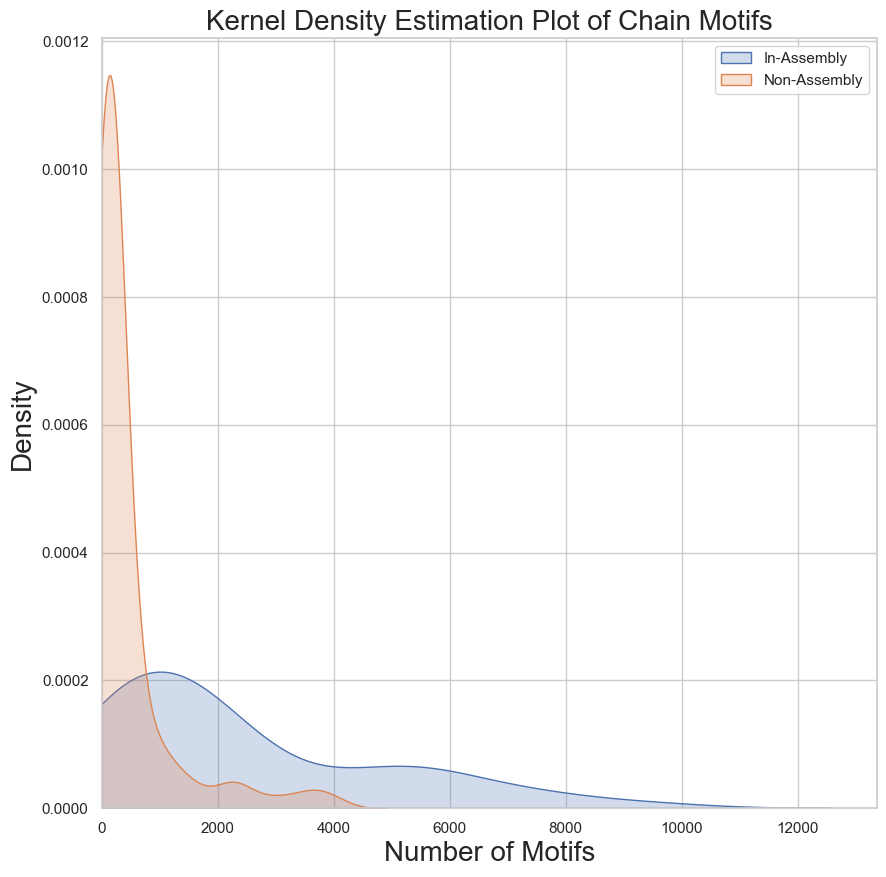

In [38]:
### See the general distribution of the assembly counts to justify the statistical test
## In-assemlby test is bi-modal, so t-test wouldn't be the best to use 
sns.kdeplot(assembly_counts, fill = True, label = 'In-Assembly')
sns.kdeplot(non_assembly_counts, fill = True, label = 'Non-Assembly')
plt.legend()
plt.title('Kernel Density Estimation Plot of Chain Motifs', size = 20)
plt.xlabel('Number of Motifs', size = 20)
plt.ylabel('Density', size = 20)
plt.xlim(0)
plt.show()
#plt.savefig("Kernel_Density_Estimator_Motif_Distributions.png", dpi = 1200)

In [39]:
### FOUND THIS CODE AT THIS LINK SAI: MAYBE TRY TO PLAY WITH IT https://stackoverflow.com/questions/70613625/how-can-i-generate-a-cdf-using-kernel-density-estimation-in-python
# kde_a = stats.gaussian_kde(assembly_counts)
# kde_na = stats.gaussian_kde(non_assembly_counts)

# class KDEDist(stats.rv_continuous):
    
#     def __init__(self, kde, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         self._kde = kde
    
#     def _pdf(self, x):
#         return self._kde.pdf(x)

# A_X = KDEDist(kde_a)
# NA_X = KDEDist(kde_na)

# fig, axe = plt.subplots()
# #axe.hist(data, density=1)
# axe.plot(x, A_X.cdf(x))
# #axe.plot(x, NA_X.cdf(x))

In [40]:
print(np.mean(assembly_counts), np.mean(non_assembly_counts))
print(np.median(assembly_counts), np.median(non_assembly_counts))

2388.5862068965516 426.3960396039604
1547.0 147.0


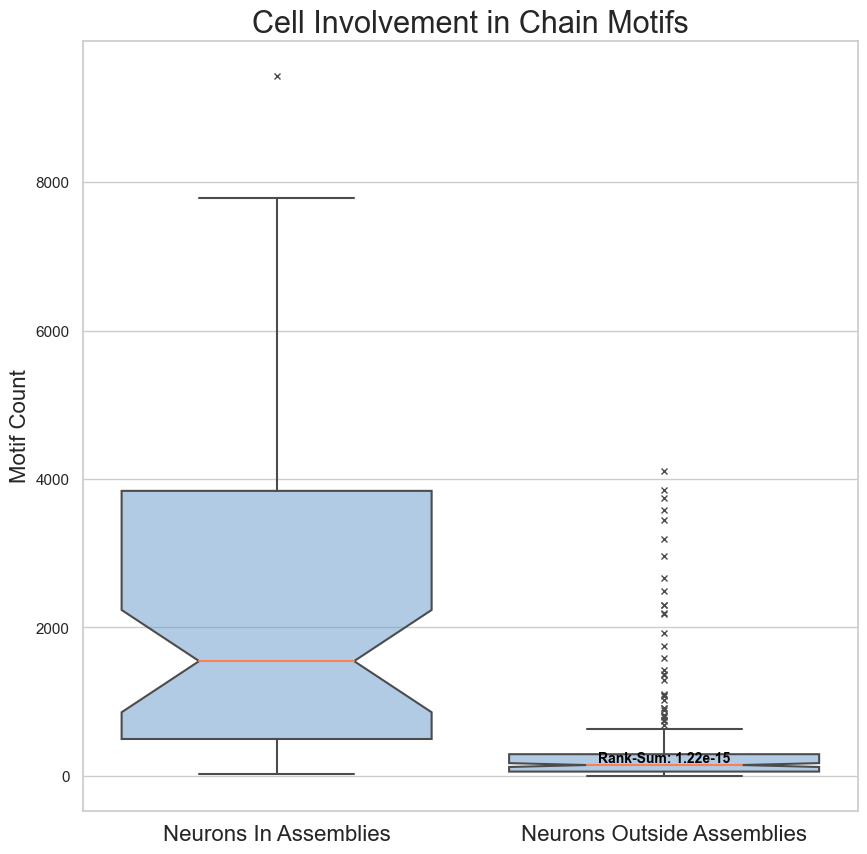

In [41]:
all_arr = [np.array(assembly_counts).flatten(),
            np.array(non_assembly_counts).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Neurons In Assemblies", "Neurons Outside Assemblies"], size = 16)
ax.set_title('Cell Involvement in Chain Motifs', size = 22)
ax.set_ylabel('Motif Count', size = 16)

medians = np.array(
    [np.median(np.array(assembly_counts).flatten()),
     np.median(np.array(non_assembly_counts).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'Rank-Sum: {:.3g}'.format(stats.ranksums(np.array(assembly_counts).flatten(), np.array(non_assembly_counts).flatten()).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('chain_motif_corrected_indexes_boxplot.png', dpi = 1200)
plt.show()

### Analysis with Dot Motif

In [2]:
import v1dd_coregistration_wrangling

tables, mappings = v1dd_coregistration_wrangling.get_tables_and_mappings(online=True)
print(tables.keys())
print(mappings.keys())

dict_keys(['assemblies_by_roi_id', 'assemblies_by_pt_root_id', 'assemblies_by_connectome_id', 'assemblies_by_functional_index', 'functional_indexes_by_assembly', 'coregistration', 'cell'])
dict_keys(['pt_root_id_to_connectome_id', 'connectome_id_to_root_id', 'roi_id_to_pt_root_id', 'functional_index_to_roi_id'])


In [5]:
tables['coregistration']

,pt_root_id,target_id,session,scan_idx,field,unit_id,roi_id
0,864691132829981561,276266,1,3,1,117,plane1_roi_0117
1,864691132728579766,276140,1,3,1,75,plane1_roi_0075
2,864691132829980060,290027,1,3,1,26,plane1_roi_0026
3,864691132782526604,365414,1,3,1,163,plane1_roi_0163
4,864691132656629475,365704,1,3,1,31,plane1_roi_0031
...,...,...,...,...,...,...,...
162,864691132687688330,291956,1,3,3,32,plane3_roi_0032
163,864691132999886005,279007,1,3,3,250,plane3_roi_0250
164,864691132667436992,276453,1,3,1,6,plane1_roi_0006
165,864691132679477085,276650,1,3,1,22,plane1_roi_0022


In [6]:
tables['cell']

,index,pt_root_id,target_id,cell_type,pt_position,soma_layer,full_connectome_index
0,3,864691132625300120,293764,PYC,"[882.3273740159214, 348.2992615823263, 49.7502...",4,0
1,19,864691132710501931,295576,BC,"[846.1511939783203, 407.8189411938162, 116.071...",5,1
2,24,864691132830575876,278405,MC,"[741.1664982372881, 269.52172688591605, 122.27...",23,2
3,31,864691132616354625,293733,BPC,"[862.543768852058, 349.23141366917696, 44.0541...",4,3
4,34,864691132999200949,307952,PYC,"[872.0169357283554, 490.6735632622339, 28.3308...",5,4
...,...,...,...,...,...,...,...
707,3752,864691132690984696,352177,BC,"[911.9532185557016, 266.8306003665616, 76.2196...",23,707
708,3754,864691132763271347,383491,PYC,"[933.106127419254, 463.0370044502767, 91.12912...",5,708
709,3755,864691132679146333,385115,PYC,"[979.9463704043851, 534.8907307114326, 152.600...",5,709
710,3758,864691132653866455,277788,PYC,"[856.7979071003217, 208.24308235422248, 107.28...",23,710


In [10]:
for key, value in v1dd_coregistration_wrangling.invert_dict(tables['assemblies_by_roi_id']).items():
    print('For Assembly', key, "there are", len(value), "rois")
#v1dd_coregistration_wrangling.invert_dict(tables['assemblies_by_roi_id'])

For Assembly A 1 there are 1016 rois
For Assembly A 5 there are 230 rois
For Assembly A 3 there are 328 rois
For Assembly A 6 there are 188 rois
For Assembly A 4 there are 325 rois
For Assembly A 9 there are 121 rois
For Assembly A 10 there are 114 rois
For Assembly A 11 there are 112 rois
For Assembly A 7 there are 187 rois
For Assembly A 2 there are 542 rois
For Assembly A 15 there are 23 rois
For Assembly A 8 there are 181 rois
For Assembly A 14 there are 35 rois
For Assembly A 12 there are 61 rois
For Assembly A 13 there are 48 rois
For Assembly No A there are 748 rois


In [13]:
assemblies_by_coregistered = v1dd_coregistration_wrangling.invert_dict(tables['assemblies_by_connectome_id'])

counter = 0
for val in assemblies_by_coregistered.values():
    if val != [None]:
        counter += len(val)
print("Total Number of Neurons that are Coregistered & Assigned to Assemblies or the None Assemlby Set:", counter)
for key, val in assemblies_by_coregistered.items():
    print(key,":", val)
#assemblies_by_coregistered

Total Number of Neurons that are Coregistered & Assigned to Assemblies or the None Assemlby Set: 100
A 1 : [310, 680, 246, 8, 517, 375, 101, 615, 133, 181, 448, 575, 352, 546, 286, 348, 99, 163, 23, 697, 266, 627]
A 3 : [680, 246, 375, 448, 352, 546, 23, 627, 248, 184]
A 4 : [680, 246, 615, 133, 99, 23, 664, 43, 543, 670, 132]
A 7 : [680, 246, 517, 615, 133, 184, 670, 132, 587]
A 5 : [246, 517, 352, 664, 670, 132, 587]
A 8 : [246, 615, 133, 181, 627, 184, 670, 132]
A 10 : [517, 598, 318, 596]
A 2 : [181, 546, 697, 671, 57, 88, 371, 598, 664, 318]
A 6 : [286, 163, 266, 703]
A 11 : [57]
A 9 : [467, 519]
A 12 : [467]
A 14 : [242]
No A : [494, 204, 630, 636, 190, 28, 343, 401, 674, 71]


In [36]:
### Check that this is the most updated dot motif file
three_chain_dot_motif_result = pd.read_pickle("./dot_motif_results/pyc_stefan_motif_three_chain_results.pickle")
max_idx = []
for d in three_chain_dot_motif_result:
    max_idx.append(max(d.values()))
max(max_idx)

711

In [37]:
#three_chain_dot_motif_result
three_chain_dot_motif_result_df = pd.DataFrame(three_chain_dot_motif_result)
three_chain_dot_motif_result_df

,A,B,C
0,0,3,9
1,0,3,25
2,0,3,39
3,0,3,52
4,0,3,72
...,...,...,...
1555812,711,706,679
1555813,711,706,683
1555814,711,706,691
1555815,711,706,700


In [64]:
# initialize data frames for keeping track of chain motifs
assembly_A=pd.DataFrame()
assembly_B=pd.DataFrame()
assembly_C=pd.DataFrame()

all_a = set()
for assignment in assemblies_by_coregistered:
    if assignment != 'No A':
        for id in assemblies_by_coregistered[assignment]:
            all_a.add(id)
all_a = np.array(list(all_a))

for connectome_id in all_a:
    # we check if the first or third position is an connectome_id assigned to an assembly
    mask = three_chain_dot_motif_result_df.A.apply(lambda x: connectome_id == x)
    A = three_chain_dot_motif_result_df[mask]
    assembly_A = pd.concat([assembly_A,A])

    mask = three_chain_dot_motif_result_df.B.apply(lambda x: connectome_id == x)
    B = three_chain_dot_motif_result_df[mask]
    assembly_B = pd.concat([assembly_B,B])

    mask = three_chain_dot_motif_result_df.C.apply(lambda x: connectome_id == x)
    C = three_chain_dot_motif_result_df[mask]
    assembly_C = pd.concat([assembly_C,C])

# keep track of assembly cell ids
assembly_A['assembly_cell_id'] = assembly_A['A']
assembly_B['assembly_cell_id'] = assembly_B['B']
assembly_C['assembly_cell_id'] = assembly_C['C']


# combine all information to one data frame
assembly_motifs = pd.DataFrame()
assembly_motifs = pd.concat([assembly_A,assembly_B,assembly_C])
#assembly_motifs['cell_types'] = [tuple(x) for x in assembly_motifs['cell_types']]
assembly_motifs

,A,B,C,assembly_cell_id
328683,132,7,11,132
328684,132,7,23,132
328685,132,7,28,132
328686,132,7,30,132
328687,132,7,39,132
...,...,...,...,...
1554985,711,462,248,248
1555351,711,506,248,248
1555420,711,516,248,248
1555561,711,606,248,248


In [66]:
# initialize data frames for keeping track of chain motifs
no_assembly_A=pd.DataFrame()
no_assembly_B=pd.DataFrame()
no_assembly_C=pd.DataFrame()

# Only need to check with neurons who have been assigned to no assemblies
for connectome_id in assemblies_by_coregistered['No A']:
    # we check if the first or third position is an connectome_id assigned to an assembly
    mask = three_chain_dot_motif_result_df.A.apply(lambda x: connectome_id == x)
    A = three_chain_dot_motif_result_df[mask]
    no_assembly_A = pd.concat([no_assembly_A,A])

    mask = three_chain_dot_motif_result_df.B.apply(lambda x: connectome_id == x)
    B = three_chain_dot_motif_result_df[mask]
    no_assembly_B = pd.concat([no_assembly_B,B])

    mask = three_chain_dot_motif_result_df.C.apply(lambda x: connectome_id == x)
    C = three_chain_dot_motif_result_df[mask]
    no_assembly_C = pd.concat([no_assembly_C,C])

# keep track of assembly cell ids
no_assembly_A['assembly_cell_id'] = no_assembly_A['A']
no_assembly_B['assembly_cell_id'] = no_assembly_B['B']
no_assembly_C['assembly_cell_id'] = no_assembly_C['C']


# combine all information to one data frame
no_assembly_motifs = pd.DataFrame()
no_assembly_motifs = pd.concat([no_assembly_A,no_assembly_B,no_assembly_C])
#assembly_motifs['cell_types'] = [tuple(x) for x in assembly_motifs['cell_types']]
no_assembly_motifs

,A,B,C,assembly_cell_id
1078659,494,57,55,494
1078660,494,57,61,494
1078661,494,57,68,494
1078662,494,57,107,494
1078663,494,57,113,494
...,...,...,...,...
1553159,709,626,28,28
1553442,711,55,28,28
1553560,711,56,28,28
1553721,711,87,28,28


In [68]:
### define the assembly counts
assembly_counts = assembly_motifs['assembly_cell_id'].value_counts()
assembly_counts

assembly_cell_id
43     13362
310    12262
467    11947
99     10900
517     9424
375     9309
133     9232
587     9074
627     9004
352     8802
596     8530
546     8482
615     8214
670     7914
163     7326
132     7215
248     7117
348     6577
697     6460
23      6430
184     6140
575     6022
664     5863
57      5564
246     4887
703     4740
680     4375
286     3849
318     3826
671     1540
Name: count, dtype: int64

In [69]:
### define the non_assembly counts
non_assembly_counts = no_assembly_motifs['assembly_cell_id'].value_counts()
non_assembly_counts

assembly_cell_id
204    10233
190     9089
28      7991
630     7728
636     7305
494     4732
Name: count, dtype: int64

/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


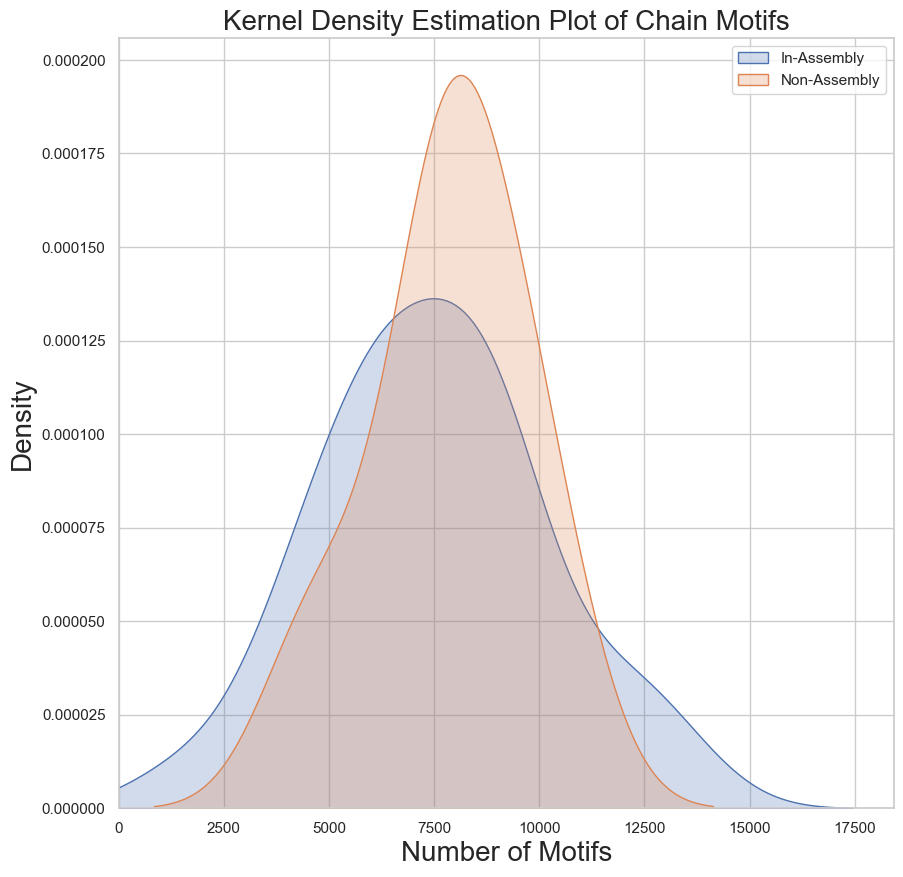

In [71]:
### See the general distribution of the assembly counts to justify the statistical test
## In-assemlby test is bi-modal, so t-test wouldn't be the best to use 
sns.kdeplot(assembly_counts, fill = True, label = 'In-Assembly')
sns.kdeplot(non_assembly_counts, fill = True, label = 'Non-Assembly')
plt.legend()
plt.title('Kernel Density Estimation Plot of Chain Motifs', size = 20)
plt.xlabel('Number of Motifs', size = 20)
plt.ylabel('Density', size = 20)
plt.xlim(0)
plt.show()
#plt.savefig("Kernel_Density_Estimator_Motif_Distributions.png", dpi = 1200)

In [72]:
print(np.mean(assembly_counts), np.mean(non_assembly_counts))
print(np.median(assembly_counts), np.median(non_assembly_counts))

7479.566666666667 7846.333333333333
7270.5 7859.5


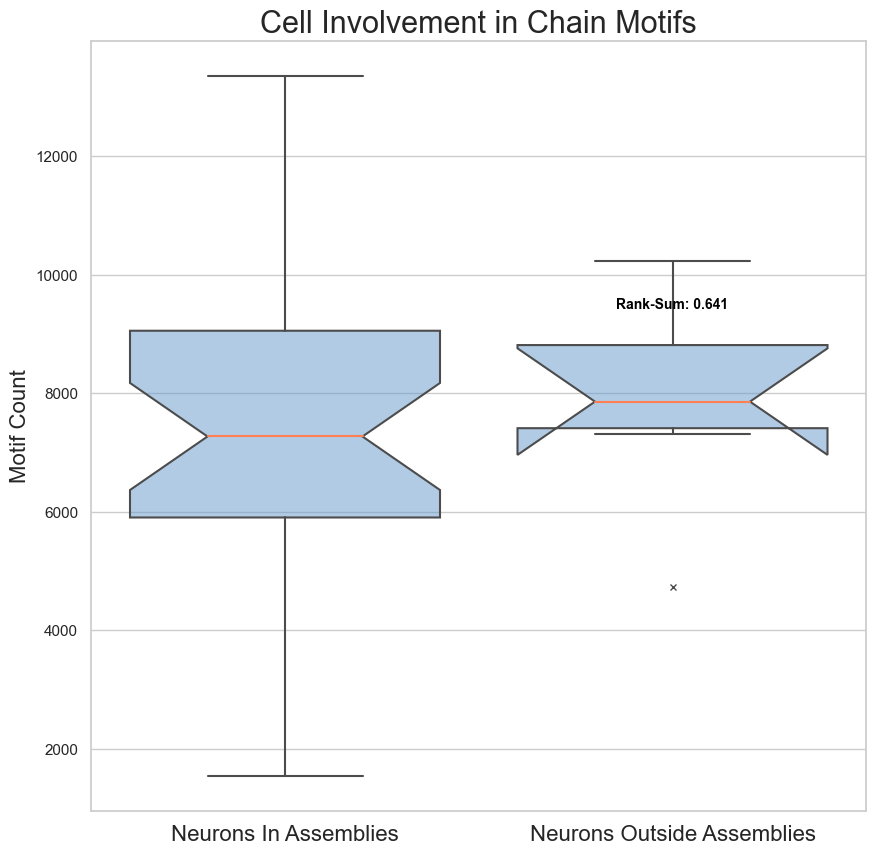

In [73]:
all_arr = [np.array(assembly_counts).flatten(),
            np.array(non_assembly_counts).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Neurons In Assemblies", "Neurons Outside Assemblies"], size = 16)
ax.set_title('Cell Involvement in Chain Motifs', size = 22)
ax.set_ylabel('Motif Count', size = 16)

medians = np.array(
    [np.median(np.array(assembly_counts).flatten()),
     np.median(np.array(non_assembly_counts).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'Rank-Sum: {:.3g}'.format(stats.ranksums(np.array(assembly_counts).flatten(), np.array(non_assembly_counts).flatten()).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('dot_motif_three_chain_boxplot.png', dpi = 1200)
plt.show()

In [9]:
# a = set()

# for key, val in tables['assemblies_by_roi_id'].items():
#     for v in val:
#         a.add(v)
#         if v == 'No A':
#             print(key)
# a

In [11]:
tables['assemblies_by_connectome_id']

{310: ['A 1'],
 680: ['A 1', 'A 3', 'A 4', 'A 7'],
 246: ['A 1', 'A 3', 'A 4', 'A 5', 'A 7', 'A 8'],
 8: ['A 1'],
 517: ['A 1', 'A 5', 'A 7', 'A 10'],
 375: ['A 1', 'A 3'],
 101: ['A 1'],
 615: ['A 1', 'A 4', 'A 7', 'A 8'],
 133: ['A 1', 'A 4', 'A 7', 'A 8'],
 181: ['A 1', 'A 2', 'A 8'],
 448: ['A 1', 'A 3'],
 575: ['A 1'],
 352: ['A 1', 'A 3', 'A 5'],
 546: ['A 1', 'A 2', 'A 3'],
 286: ['A 1', 'A 6'],
 348: ['A 1'],
 99: ['A 1', 'A 4'],
 163: ['A 1', 'A 6'],
 23: ['A 1', 'A 3', 'A 4'],
 697: ['A 1', 'A 2'],
 266: ['A 1', 'A 6'],
 627: ['A 1', 'A 3', 'A 8'],
 671: ['A 2'],
 57: ['A 2', 'A 11'],
 88: ['A 2'],
 371: ['A 2'],
 598: ['A 2', 'A 10'],
 664: ['A 2', 'A 4', 'A 5'],
 318: ['A 2', 'A 10'],
 248: ['A 3'],
 184: ['A 3', 'A 7', 'A 8'],
 43: ['A 4'],
 543: ['A 4'],
 670: ['A 4', 'A 5', 'A 7', 'A 8'],
 132: ['A 4', 'A 5', 'A 7', 'A 8'],
 587: ['A 5', 'A 7'],
 703: ['A 6'],
 467: ['A 9', 'A 12'],
 519: ['A 9'],
 596: ['A 10'],
 242: ['A 14'],
 494: ['No A'],
 204: ['No A'],
 630: ['No

In [ ]:
assemblies_by_coregistered = pd.read_pickle("v1dd_connectome_cell_indexes_by_assembly.pkl")
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,):print(assemblies_by_coregistered)

{0: [64, 149, 89, 10, 12, 87, 122, 62, 109, 69, 52, 108, 110, 159, 66, 135, 92, 45, 24, 42, 153, 41], 1: [148, 130, 125], 2: [76, 75, 4, 78, 58, 112, 59, 17, 90], 3: [14, 73], 4: [11, 65, 99, 39], 5: [14, 65, 34], 6: [148], 7: [70, 64, 149, 1, 75, 89, 78, 88, 150, 71, 167, 87, 47, 48, 62, 109, 69, 52, 55, 123, 152, 53, 117, 68, 22, 56, 144, 66, 125, 92, 156, 126, 72, 137, 32, 24, 153, 138, 141, 102, 95, 104, 94, 27], 8: [4, 78, 13, 167, 47, 120, 80, 63, 52, 55, 112, 157, 51, 59, 159, 113, 35, 144, 156, 160, 126, 90, 37, 29, 26, 104], 9: [84, 80, 79, 55, 22, 56, 144, 72, 33, 93, 141, 98], 10: [82, 128, 63, 112, 101, 39], 11: [64, 149, 150, 71, 147, 62, 129, 74, 110, 124, 57, 159, 117, 68, 144, 66, 92, 160, 126, 28, 161], 12: [64, 149, 75, 12, 150, 71, 124, 57, 158, 117, 20, 161], 13: [21, 149, 75, 109, 69, 53, 110, 57, 159, 158, 117, 155, 160, 28, 41, 161], 14: [3, 149, 12, 150, 71, 167, 62, 111, 124, 57, 20, 66, 23, 153, 101, 161]}
